이 보고서는 portmis.go.kr의 선박입출항현황 데이터를 기반으로 작성되었다.
(출처: https://www.data.go.kr/data/15083024/fileData.do)

입출항기간을 2020-01-01부터 2021-12-31까지로, 외항입항과 외항출항만을 선택하여 코로나 전후에 따른 국제선박무역 추이를 중점적으로 살펴보고자 하였다.

## 1. 데이터 정리

최대 50000개씩 2년까지 조회됨에 따라, 총 6개로 나눠 다운받아 합치는 과정을 진행하였다.

또한 thousands=r','를 통해 총톤수에서의 자릿점을 제거함으로써 수치형으로 인식되도록 하였다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
ship1=pd.ExcelFile('선박입출항현황(1).xlsx')
ship2=pd.ExcelFile('선박입출항현황(2).xlsx')
ship3=pd.ExcelFile('선박입출항현황(3).xlsx')
ship4=pd.ExcelFile('선박입출항현황(4).xlsx')
ship5=pd.ExcelFile('선박입출항현황(5).xlsx')
ship6=pd.ExcelFile('선박입출항현황(6).xlsx')

ship1=ship1.parse('sheet', thousands=r',')
ship2=ship2.parse('sheet', thousands=r',')
ship3=ship3.parse('sheet', thousands=r',')
ship4=ship4.parse('sheet', thousands=r',')
ship5=ship5.parse('sheet', thousands=r',')
ship6=ship6.parse('sheet', thousands=r',')

ship=pd.concat([ship1, ship2, ship3, ship4, ship5, ship6])

자료는 아래와 같은 정보를 포함하고 있다.

In [11]:
ship.head()

,항명,호출부호,선명,입항횟수,입항횟수.1,구분,외내,입출,총톤수,입항일시,...,항해구분,MRN 번호,계선장소,계선장소.1,계선장소.2,차항지,전출항지,선박용도,부선호출부호1,부선호출부호2
0,옥포,3EDF2,HMM ALGECIRAS,2020,1,최종,외항,출항,228283.0,1950-01-01 00:00,...,신조선,20ESLJS083E,MBO,04,옥포 C안벽,QINGDAO,NaN,풀컨테이너선,NaN,NaN
1,옥포,3EEN3,HMM HELSINKI,2020,1,최종,외항,출항,228283.0,1950-01-01 00:00,...,신조선,20HDMUS193E,MBO,04,옥포 C안벽,장승포,NaN,풀컨테이너선,NaN,NaN
2,울산,3EFF5,EVER CHARM,2020,1,최종,외항,출항,17933.0,1950-01-01 00:00,...,신조선,20GRTSD110E,WAB,02,(구)벙커링전용정박지 E2,KAOHSIUNG,NaN,신조선,NaN,NaN
3,고현,3EHU5,HMM STOCKHOLM,2020,1,최종,외항,출항,232311.0,1950-01-01 00:00,...,신조선,20HDMUS212E,MBK,13,J안벽,부산,NaN,풀컨테이너선,NaN,NaN
4,옥포,3EIO3,HMM COPENHAGEN,2020,1,최종,외항,출항,228283.0,1950-01-01 00:00,...,신조선,20HDMUS109E,MBO,06,옥포 E안벽,부산,NaN,풀컨테이너선,NaN,NaN


필요없는 컬럼을 제외하여 모든 컬럼이 보일 수 있도록 조정하였고, 컬럼 이름을 알아보기 쉽게 변경하였다.

In [12]:
ship=ship.drop(['외내','MRN 번호','계선장소','계선장소.1','계선장소.2','부선호출부호1','부선호출부호2'], axis=1)
ship.columns=['항명','호출부호','선명','연도','횟수','구분','입출','총톤수','입항일시','출항일시','수리일시','선종','목적지','전출항지','선박용도']

In [13]:
ship.head()

,항명,호출부호,선명,연도,횟수,구분,입출,총톤수,입항일시,출항일시,수리일시,선종,목적지,전출항지,선박용도
0,옥포,3EDF2,HMM ALGECIRAS,2020,1,최종,출항,228283.0,1950-01-01 00:00,2020-04-24 10:00,2020-04-28 09:48,신조선,QINGDAO,NaN,풀컨테이너선
1,옥포,3EEN3,HMM HELSINKI,2020,1,최종,출항,228283.0,1950-01-01 00:00,2020-07-17 14:00,2020-07-20 14:54,신조선,장승포,NaN,풀컨테이너선
2,울산,3EFF5,EVER CHARM,2020,1,최종,출항,17933.0,1950-01-01 00:00,2020-06-16 20:05,2020-06-19 18:15,신조선,KAOHSIUNG,NaN,신조선
3,고현,3EHU5,HMM STOCKHOLM,2020,1,최종,출항,232311.0,1950-01-01 00:00,2020-08-17 01:00,2020-09-02 10:50,신조선,부산,NaN,풀컨테이너선
4,옥포,3EIO3,HMM COPENHAGEN,2020,1,최종,출항,228283.0,1950-01-01 00:00,2020-05-22 10:00,2020-05-28 09:35,신조선,부산,NaN,풀컨테이너선


In [14]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297458 entries, 0 to 47457
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   항명      297458 non-null  object 
 1   호출부호    297458 non-null  object 
 2   선명      297458 non-null  object 
 3   연도      297458 non-null  int64  
 4   횟수      297458 non-null  int64  
 5   구분      297458 non-null  object 
 6   입출      297458 non-null  object 
 7   총톤수     297287 non-null  float64
 8   입항일시    297458 non-null  object 
 9   출항일시    297427 non-null  object 
 10  수리일시    297173 non-null  object 
 11  선종      297367 non-null  object 
 12  목적지     297229 non-null  object 
 13  전출항지    296958 non-null  object 
 14  선박용도    297405 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 36.3+ MB


실질적으로 범주형 및 시계열 변수인 것들의 타입을 변경하였다.

In [15]:
ship['연도'] = pd.Categorical(ship['연도'])
ship['구분'] = pd.Categorical(ship['구분'])
ship['입출'] = pd.Categorical(ship['입출'])
ship['입항일시'] = pd.to_datetime(ship['입항일시'])
ship['출항일시'] = pd.to_datetime(ship['출항일시'])
ship['수리일시'] = pd.to_datetime(ship['수리일시'])
ship['선종'] = pd.Categorical(ship['선종'])
ship['전출항지'] = pd.Categorical(ship['전출항지'])
ship['선박용도'] = pd.Categorical(ship['선박용도'])

In [16]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297458 entries, 0 to 47457
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   항명      297458 non-null  object        
 1   호출부호    297458 non-null  object        
 2   선명      297458 non-null  object        
 3   연도      297458 non-null  category      
 4   횟수      297458 non-null  int64         
 5   구분      297458 non-null  category      
 6   입출      297458 non-null  category      
 7   총톤수     297287 non-null  float64       
 8   입항일시    297458 non-null  datetime64[ns]
 9   출항일시    297427 non-null  datetime64[ns]
 10  수리일시    297173 non-null  datetime64[ns]
 11  선종      297367 non-null  category      
 12  목적지     297229 non-null  object        
 13  전출항지    296958 non-null  category      
 14  선박용도    297405 non-null  category      
dtypes: category(6), datetime64[ns](3), float64(1), int64(1), object(4)
memory usage: 24.7+ MB


In [17]:
ship.describe(include='all')

C:\Users\user\AppData\Local\Temp\ipykernel_23984\2146002061.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ship.describe(include='all')
C:\Users\user\AppData\Local\Temp\ipykernel_23984\2146002061.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ship.describe(include='all')
C:\Users\user\AppData\Local\Temp\ipykernel_23984\2146002061.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

,항명,호출부호,선명,연도,횟수,구분,입출,총톤수,입항일시,출항일시,수리일시,선종,목적지,전출항지,선박용도
count,297458,297458,297458,297458.0,297458.000000,297458,297458,297287.000000,297458,297427,297173,297367,297229,296958,297405
unique,39,16361,16089,7.0,NaN,3,2,NaN,110808,109003,110398,11,1520,1390,39
top,부산,JG5720,뉴 카멜리아,2020.0,NaN,최종,출항,NaN,1950-01-01 00:00:00,2020-08-12 16:00:00,1950-01-01 00:00:00,기타,OCEAN DISTRICT,부산,풀컨테이너선
freq,91344,1189,1189,150607.0,NaN,297271,148767,NaN,157,26,135,293117,14993,18367,87143
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-01 00:00:00,2020-01-01 00:00:00,1950-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31 23:58:00,2022-10-31 07:45:00,2022-09-29 17:33:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,10.362797,NaN,NaN,24347.731698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,21.067722,NaN,NaN,33679.294969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,3869.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. 데이터 탐색

각 컬럼이 의미하는 바는 다음과 같다.

- 항명: 항구 이름
- 호출부호: 부호
- 선명: 선박 이름
- 연도: 입항/출항한 연도
- 횟수: 입항/출항한 횟수
- 구분: 최초/최종/변경
- 입출: 입항/출항 구분
- 총톤수: 무게
- 입항일시: 입항한 연/월/일
- 출항일시: 출항한 연/월/일
- 수리일시: 수리한 연/월/일
- 선종: 선박 종류
- 목적지: 차항지
- 전출항지: 직전에 출항한 장소
- 선박용도: 선박의 용도

각 컬럼에 어떤 항목이 얼마나 들어있는지 간단히 파악해보자.

In [18]:
ship['항명'].value_counts()

부산          91344
울산          43969
인천          29861
광양          26003
평택          20278
여천          20001
여수          13989
대산          11038
포항신항         9546
군산           7010
마산           6576
동해           3802
통영           2592
대불분실         2583
영일만항         1479
고현           1110
보령            791
진해            746
태안            478
호산            475
옥포            449
당진화력          448
옥계            425
삼천포           390
장항            368
묵호            344
경인            291
하동            282
속초            234
목포            211
제주            210
불개항-불개항청       51
거문도            32
포항             26
완도             10
흑산도             8
삼척              4
장승포             2
용기포             2
Name: 항명, dtype: int64

In [19]:
ship['선명'].value_counts()

뉴 카멜리아             1189
산스타드림               762
HAMAYUU             688
성희호                 682
흥아울산호               634
                   ... 
NEVER                 1
GASLOG WALES          1
대천에이스                 1
TVERSKOY BRIDGE       1
CMA CGM JAMAICA       1
Name: 선명, Length: 16089, dtype: int64

In [20]:
ship['연도'].value_counts()

2020    150607
2021    146081
2019       756
2018         7
2017         5
2014         1
2022         1
Name: 연도, dtype: int64

In [21]:
ship['구분'].value_counts()

최종    297271
최초       106
변경        81
Name: 구분, dtype: int64

In [22]:
ship['입출'].value_counts()

출항    148767
입항    148691
Name: 입출, dtype: int64

In [23]:
ship['선종'].value_counts()

기타         293117
내외항자격변경      1716
원양조업선        1391
일시외항          622
신조선           378
선명변경           72
수출선박           31
외국적 내항선        24
폐선예정            9
실습선,관공선         6
개인항해            1
Name: 선종, dtype: int64

In [24]:
ship['목적지'].value_counts()

OCEAN DISTRICT       14993
부산                   14159
광양                   13534
SINGAPORE            11730
울산                   10674
                     ...  
HIRASAKI                 1
SHENYANG                 1
BENGKALIS, ST            1
HAIFA                    1
BALONGAN TERMINAL        1
Name: 목적지, Length: 1520, dtype: int64

In [25]:
ship['전출항지'].value_counts()

부산                   18367
울산                   12283
SHANGHAI              9502
QINGDAO               8770
인천                    8589
                     ...  
BALONGAN TERMINAL        1
MISAKI, KANAGAWA         1
JOHOR BAHRU              1
MARSHALL                 1
YANAI                    1
Name: 전출항지, Length: 1390, dtype: int64

In [26]:
ship['선박용도'].value_counts()

풀컨테이너선         87143
일반화물선          56676
석유제품 운반선       31415
산물선(벌크선)       29500
케미칼 운반선        24100
LPG 운반선        12108
자동차운반선         11602
국제카페리           8881
원양 어선           8726
원유운반선           5806
냉동.냉장선          4887
LNG 운반선         4151
세미(혼재)컨테이너선     3867
여객선             2418
케미칼가스 운반선       1424
시멘트운반선          1113
기타 예선           1065
견인용예선            640
기타선              430
기타 유조선           349
철강재 운반선          319
신조선              176
광석운반선            174
군함               162
석탄운반선             96
크루즈선              59
원목운반선             41
수상레저기구            15
기타 부선             12
연근해 어선            10
용달선               10
관공선                9
준설선                6
일반화물운반용 부선         3
급유선                3
화객선                3
이.접안용 예선           2
유람선                2
압항 예선              2
Name: 선박용도, dtype: int64

2020년과 2021년을 대상으로 자료를 다운받았으나, 다른연도가 일부 포함되어있어 그 행은 제거해주었다.

In [27]:
ship=ship[(ship['연도']==2020)|(ship['연도']==2021)]
year_num=ship['연도'].value_counts()
year_num

2020    150607
2021    146081
2014         0
2017         0
2018         0
2019         0
2022         0
Name: 연도, dtype: int64

## 3. 데이터 시각화

선박입출항현황 데이터를 통해 다음을 탐색하고자 한다.

1. 항명별 입출항횟수와 비율 [막대형, 파이형 그래프]
2. 연도와 입출 [막대형 그래프]
3. 입출별 총톤수 [박스플롯]
4. 선박용도별 입항/출항횟수와 비율 [막대형, 파이형 그래프]
5. <부록> 입출항횟수와 총톤수 [산점도]

In [28]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 3-1. 항명별 입출항횟수와 비율

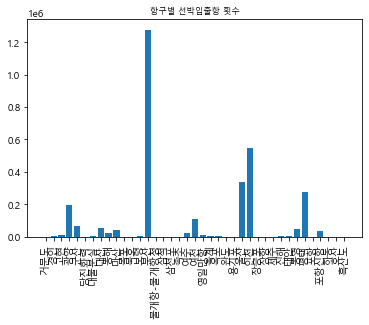

In [29]:
port=ship['횟수'].groupby(ship['항명'])
port_count=port.sum()

plt.bar(port_count.index, port_count.values)
plt.rc('font', size=7)
plt.xticks(rotation=90)
plt.title('항구별 선박입출항 횟수')
plt.show()

10의 -6승으로 y축이 표현된 것을 알 수 있다.

In [30]:
port_count

항명
거문도              88
경인             4742
고현            11535
광양           194737
군산            62772
당진화력           1074
대불분실           4297
대산            54721
동해            23667
마산            43223
목포              688
묵호              662
보령             1751
부산          1277314
불개항-불개항청        113
삼척                4
삼천포             563
속초              492
여수            24395
여천           106180
영일만항          11294
옥계             3184
옥포             1549
완도               13
용기포              42
울산           335840
인천           548559
장승포               2
장항              586
제주              256
진해             3233
태안             1187
통영            44524
평택           275445
포항              295
포항신항          32335
하동              568
호산              894
흑산도              10
Name: 횟수, dtype: int64

내림차순으로 정렬하면 다음과 같다.

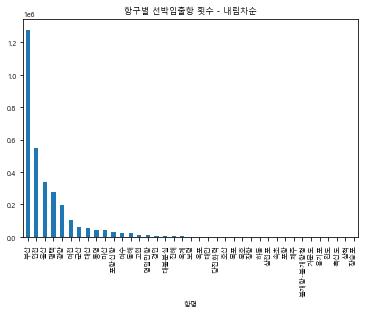

In [31]:
port_count.sort_values(ascending=False).plot(kind='bar')
plt.title('항구별 선박입출항 횟수 - 내림차순')
plt.show()

각 항구가 차지하는 입출항 비율을 파이형 그래프로 나타내보았다. 

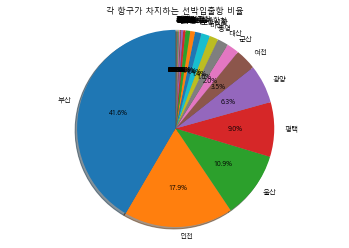

In [32]:
port_count=port_count.sort_values(ascending=False)
labels = []
for i in port_count.index:
    labels.append(i)
sizes = []
for i in port_count.values/sum(port_count.values):
    sizes.append(i)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('각 항구가 차지하는 선박입출항 비율')
plt.show()

부산 1,277,314건(41.6%), 인천 548,559건(17.9%), 울산 335,840건(10.9%) 순으로 입출항횟수가 많은 것을 확인할 수 있었다.

### 3-2. 연도와 입출

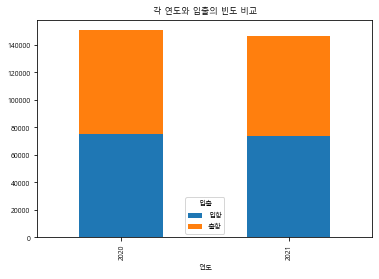

In [33]:
counts = pd.crosstab(ship['연도'], ship['입출'])
counts.plot(kind='bar', stacked=True)
num=ship[(ship['연도']==2020)|(ship['입출']=='입항')]
plt.title('각 연도와 입출의 빈도 비교')
plt.show()

In [34]:
counts

입출,입항,출항
연도,,
2020,75277,75330
2021,73358,72723


2020년과 2021년의 국제선박무역 추이는 소폭 감소하였을 뿐 큰 차이가 없음이 확인되었다.

입항과 출항 또한 두 연도간 차이가 크지 않은 것으로 나타났다.

In [35]:
rate=((year_num.values[year_num.index==2021] - year_num.values[year_num.index==2020]) / year_num.values[year_num.index==2020])*100
print('2020년 대비 2021년 선박입출항 증감률 =', float(rate), '%')

2020년 대비 2021년 선박입출항 증감률 = -3.0051724023451767 %


실제로 계산한 결과 약 -3%의 감소율만을 보여주었다.

### 3-3. 입출별 총톤수

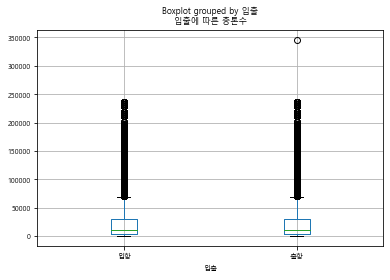

In [36]:
ship.boxplot(column=['총톤수'], by='입출')
plt.title('입출에 따른 총톤수')
plt.show()

입항과 출항 간의 총톤수 또한 중앙값, 제1사분위수, 제3사분위수, 이상치 등 큰 차이가 없었다.

출항인 경우에서 다른 값과 오차가 많이 나는 총톤수 데이터가 존재한다.

### 3-4. 선박용도별 입항/출항횟수와 비율

부분집합을 만들어 입항인 경우와 출항인 경우의 선박용도별 비율을 구해 비교하고자 한다. 

In [40]:
imports=ship[ship['입출']=='입항']
exports=ship[ship['입출']=='출항']

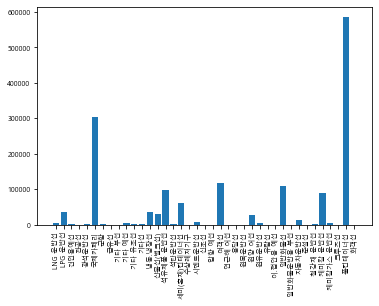

In [41]:
imports_uses=imports['횟수'].groupby(imports['선박용도'])
imports_uses_count=imports_uses.sum()

plt.bar(imports_uses_count.index, imports_uses_count.values)
plt.rc('font', size=7)
plt.xticks(rotation=90)
plt.show()

In [50]:
imports_uses_count

선박용도
풀컨테이너선         584572
국제카페리          303403
여객선            116296
일반화물선          109651
석유제품 운반선        97676
케미칼 운반선         90293
세미(혼재)컨테이너선     62074
LPG 운반선         35688
냉동.냉장선          34456
산물선(벌크선)        31046
원양 어선           27940
자동차운반선          13279
시멘트운반선           8304
원유운반선            5437
케미칼가스 운반선        5279
기타 예선            5124
LNG 운반선          4132
견인용예선            2850
철강재 운반선          1470
기타선               842
기타 유조선            450
석탄운반선             205
광석운반선             194
군함                175
신조선                69
크루즈선               68
원목운반선              29
수상레저기구             14
기타 부선              12
관공선                11
연근해 어선             10
일반화물운반용 부선          9
용달선                 8
준설선                 5
급유선                 2
유람선                 1
압항 예선               1
화객선                 1
이.접안용 예선            0
Name: 횟수, dtype: int64

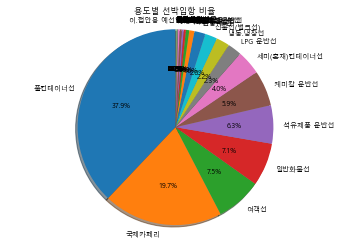

In [47]:
imports_uses_count=imports_uses_count.sort_values(ascending=False)
labels = []
for i in imports_uses_count.index:
    labels.append(i)
sizes = []
for i in imports_uses_count.values/sum(imports_uses_count.values):
    sizes.append(i)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('용도별 선박입항 비율')
plt.show()

입항인 경우, 풀컨테이너선 584,572건(37.9%), 국제카페리 303,403건(19.7%), 여객선 116,296건(7.5%) 순으로 입항횟수가 많은 것을 확인할 수 있었다.

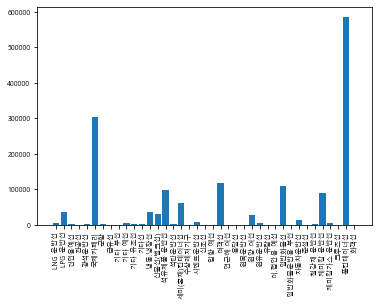

In [42]:
exports_uses=exports['횟수'].groupby(exports['선박용도'])
exports_uses_count=exports_uses.sum()

plt.bar(exports_uses_count.index, exports_uses_count.values)
plt.rc('font', size=7)
plt.xticks(rotation=90)
plt.show()

In [51]:
exports_uses_count

선박용도
풀컨테이너선         583212
국제카페리          302827
여객선            115817
일반화물선          108397
석유제품 운반선        96400
케미칼 운반선         89056
세미(혼재)컨테이너선     61819
LPG 운반선         35810
냉동.냉장선          34171
산물선(벌크선)        29308
원양 어선           27526
자동차운반선          13249
시멘트운반선           7965
원유운반선            5511
케미칼가스 운반선        5121
기타 예선            4959
LNG 운반선          4187
견인용예선            2797
철강재 운반선          1449
기타선               854
기타 유조선            448
석탄운반선             205
광석운반선             191
군함                162
신조선               108
크루즈선               66
원목운반선              28
관공선                14
수상레저기구             10
용달선                 6
화객선                 5
연근해 어선              4
이.접안용 예선            2
준설선                 2
기타 부선               2
유람선                 1
압항 예선               1
급유선                 1
일반화물운반용 부선          0
Name: 횟수, dtype: int64

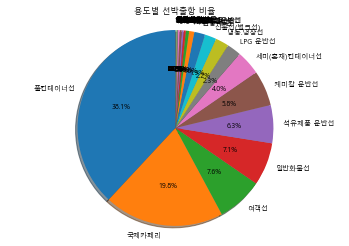

In [55]:
exports_uses_count=exports_uses_count.sort_values(ascending=False)
labels = []
for i in exports_uses_count.index:
    labels.append(i)
sizes = []
for i in exports_uses_count.values/sum(exports_uses_count.values):
    sizes.append(i)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('용도별 선박출항 비율')
plt.show()

출항인 경우, 풀컨테이너선 583,212건(35.1%), 국제카페리 302,827건(19.5%), 여객선 115,817건(7.6%) 순으로 출항횟수가 많은 것을 확인할 수 있었다.

입항인 경우와 출항인 경우 용도별 선박 비율이 굉장히 유사하였다. 

### 3-5. <부록> 입항횟수와 총톤수

그렇다면 1,4번 그래프의 y축을 총톤수로 변경해보자.

우선 입항횟수 증가에 따른 총톤수 증감 추이를 살펴보기로 한다.

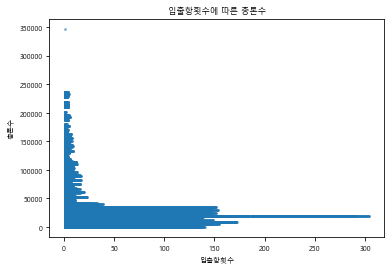

In [56]:
plt.scatter(ship['횟수'], ship['총톤수'], s=3, alpha=0.5)
plt.xlabel('입출항횟수')
plt.ylabel('총톤수')
plt.title('입출항횟수에 따른 총톤수')
plt.show()

입출항횟수가 많다고 꼭 총톤수가 많은 것은 아니었다.

아래에서도 볼 수 있듯이, 1번 그래프의 y축을 총톤수로 바꿨을 때 나타나는 비율은 차이가 있었다.

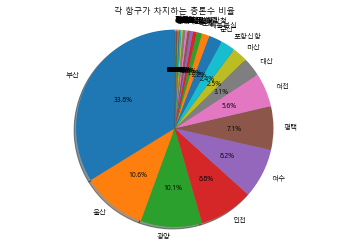

In [57]:
port=ship['총톤수'].groupby(ship['항명'])
port_count=port.sum()
port_count=port_count.sort_values(ascending=False)
labels = []
for i in port_count.index:
    labels.append(i)
sizes = []
for i in port_count.values/sum(port_count.values):
    sizes.append(i)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('각 항구가 차지하는 총톤수 비율')
plt.show()

부산 41.6%, 인천 17.9%, 울산 10.9% 순으로 입출항횟수가 많았지만,

부산 33.5%, 울산 10.6%, 광양 10.1% 순으로 총톤수가 많은 것을 확인할 수 있었다.

## 4. 발견한 점

2020~2021년 동안 전반적인 입출항횟수가 가장 많았던 항구는 부산항이었다. 인천항, 울산항이 그 뒤를 이었다.

코로나로 인한 국제무역 둔화를 예상했던 것과는 다르게, 2020년과 2021년의 입출항횟수는 약 -3%의 감소를 보이며 큰 차이가 나타나지 않았다. 각 연도의 입항과 출항도 크게 다르지 않았다.

입출에 따른 총톤수도 비슷한 통계값을 나타내었다.

입항인 경우의 선박유형 비율과 출항인 경우의 선박유형 비율 또한 둘다 풀컨테이너선, 국제카페리, 여객선 순으로 상당히 유사하였다.

마지막으로 입출항횟수와 총톤수는 완벽한 양의 관계를 나타내진 않았다. 첫번째로 살펴보았던 항명과 입출항횟수의 관계를 항명과 총톤수로 변경하였을 때, 부산>인천>울산 순에서 부산>울산>광양 순으로 결과값이 다른 모습을 보였다.